# 1.Exploratory Data Analysis (EDA)

This notebook performs exploratory analysis ONLY on Phase 1 data.

Rationale:
- Phase 1 is the only dataset allowed for full statistical analysis.
- Phase 2 and Test datasets contain forecast windows and must not be used
  for learning patterns to avoid data leakage.

Scope:
- Distribution analysis
- Seasonality inspection
- Missing value checks
- Series-level behavior

Excluded:
- Phase 2 and Test deep EDA

## 1.1 Import Libraries

In [1]:
# =========================
# Import Libraries
# =========================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 50)
plt.style.use("seaborn-v0_8")

## 1.2 Load Dataset

In [21]:
# -------------------------
# Load data
# -------------------------
phase1 = pd.read_csv("../data/processed/phase1.csv", parse_dates=["timestamp"])
phase2 = pd.read_csv("../data/processed/phase2.csv", parse_dates=["timestamp"])
test   = pd.read_csv("../data/processed/test.csv",   parse_dates=["timestamp"])

phase1.head()

,series_id,timestamp,value
0,Building3,2016-03-02 02:01:00,1321.0
1,Building3,2016-03-02 02:16:00,1321.0
2,Building3,2016-03-02 02:31:00,1321.0
3,Building3,2016-03-02 02:46:00,1293.0
4,Building3,2016-03-02 03:01:00,1293.0


## 1.3 Dataset Overview

In [20]:
# -------------------------
# Basic overview
# -------------------------

print("\nSeries count (Phase 1):")
print(phase1.groupby("series_id").size().sort_values(ascending=False))

phase1.info()
phase1.describe()


Series count (Phase 1):
series_id
Building3    160221
Solar1        61387
Solar5        59947
Solar2        46407
Solar3        46407
Solar4        46407
Building4     26095
Solar0        15207
Building5     11579
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473657 entries, 0 to 473656
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   series_id  473657 non-null  object        
 1   timestamp  473657 non-null  datetime64[ns]
 2   value      473657 non-null  float64       
 3   hour       473657 non-null  int32         
 4   dayofweek  473657 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(1)
memory usage: 14.5+ MB


,timestamp,value,hour,dayofweek
count,473657,473657.000000,473657.000000,473657.000000
mean,2019-07-02 12:34:12.913520640,177.184217,11.463709,2.980585
min,2016-03-02 02:01:00,0.000000,0.000000,0.000000
25%,2019-03-14 19:15:00,0.000000,5.000000,1.000000
50%,2019-10-27 19:16:00,2.390000,11.000000,3.000000
75%,2020-04-24 17:00:00,311.000000,18.000000,5.000000
max,2020-10-01 21:16:00,8556.000000,23.000000,6.000000
std,NaN,291.103612,6.970454,1.996150


## 1.4 Data Preparation

In [4]:
# -------------------------
# Missing values check
# -------------------------
print("\nMissing values:")
print(phase1.isna().sum())


Missing values:
series_id    0
timestamp    0
value        0
dtype: int64


In [5]:
# -------------------------
# Frequency check
# -------------------------
sample_series = "Building3"
sample = phase1[phase1.series_id == sample_series].copy()
sample = sample.sort_values("timestamp")

delta = sample.timestamp.diff().value_counts().head()
print("\nTime delta check:")
print(delta)


Time delta check:
timestamp
0 days 00:15:00    160198
0 days 00:30:00        15
0 days 01:15:00         2
4 days 16:15:00         1
0 days 05:00:00         1
Name: count, dtype: int64


## 1.5 Data Visualization

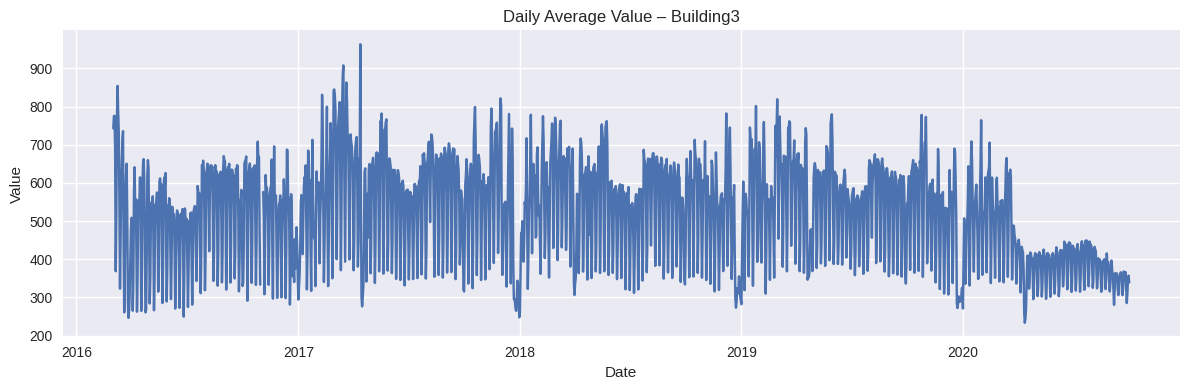

In [16]:
# -------------------------
# Visualization
# -------------------------
daily = (
    sample
    .set_index("timestamp")["value"]
    .resample("D")
    .mean()
)

plt.figure(figsize=(12,4))
plt.plot(daily)
plt.title(f"Daily Average Value – {sample_series}")
plt.xlabel("Date")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

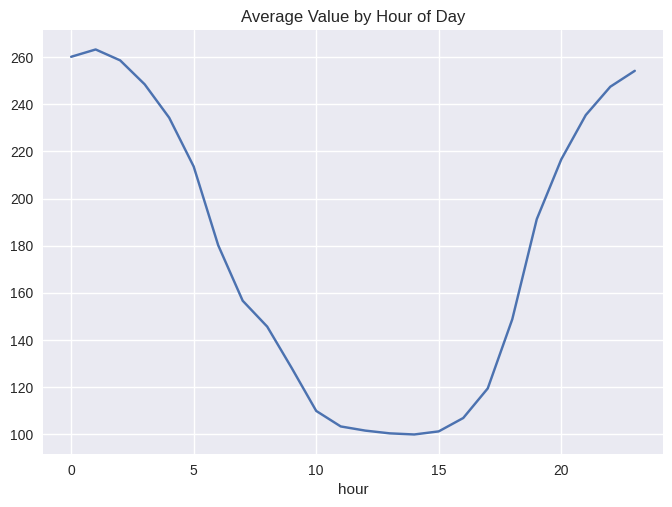

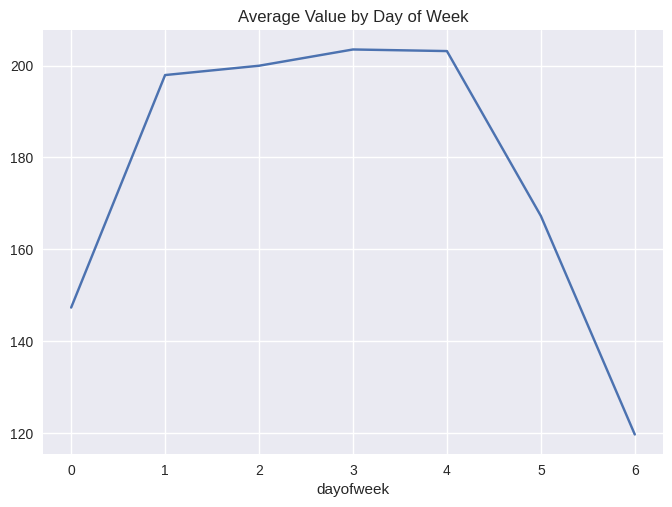

In [18]:
phase1["hour"] = phase1["timestamp"].dt.hour
phase1["dayofweek"] = phase1["timestamp"].dt.dayofweek

phase1.groupby("hour")["value"].mean().plot(
    title="Average Value by Hour of Day"
)
plt.show()

phase1.groupby("dayofweek")["value"].mean().plot(
    title="Average Value by Day of Week"
)
plt.show()

## 1.6 Sanity Chechk on Phase 2 and Test

In [19]:
print("Phase 2 value range:", phase2["value"].min(), phase2["value"].max())
print("Test value range:", test["value"].min(), test["value"].max())

Phase 2 value range: 0.0 8556.0
Test value range: 0.0 8556.0
